In [10]:
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import normaltest

In [24]:
H0 = 'Мы не можем отвергнуть нулевую гипотезу. Распределение нормально'
Ha = 'Мы отвергаем нулевую гипотезу. Распределение ненормально'
alpha = 0.05

In [8]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]

Так как размеры выборок для разных городом не совпадают, то можно произвести вставку недостающего значения средней величиной размера раковины.

In [14]:
mean_spb = round(sum(petersburg)/len(petersburg),4)
mean_spb

0.1034

Вставляем среднее значение 0.1034 в признак petersburg

In [23]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105, 0.1034]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
petersburg = pd.DataFrame(petersburg, columns=['petersburg'])
magadan = pd.DataFrame(magadan, columns=['magadan'])
data = pd.concat([petersburg, magadan], axis=1)
data.head()

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677


Оценим данные визуально. Простроим гистограммы распределения значений для каждого города.

array([[<AxesSubplot:title={'center':'petersburg'}>,
        <AxesSubplot:title={'center':'magadan'}>]], dtype=object)

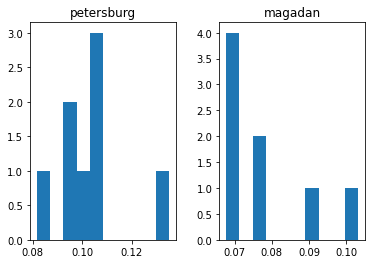

In [44]:
data[['petersburg', 'magadan']].hist(grid=False)

Визуально график для размера ракушек из Санкт-Петербурга похож на график Гауссовского распределения, а для города Магадан - нет. 

Проверяем данные на нормальность с помощью теста Шапиро-Уилка

In [25]:
_, p =shapiro(data)
print('p=%.3f' % p)
# интерпритация
if p > alpha:
    print(H0)
else:
    print(Ha)

p=0.100
Мы не можем отвергнуть нулевую гипотезу. Распределение нормально


Подтвердим полученный результат тестом Д'Агостино. Так как тест является двусторонним, то значение р должно быть менее 0.025, чтобы отвергнуть Н0.

In [27]:
_, p = normaltest(data)
print('p=%.3f' % p[0])
# интерпритация
if p[0] > alpha/2:
    print(H0)
else:
    print(Ha)

p=0.042
Мы не можем отвергнуть нулевую гипотезу. Распределение нормально


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Оценим зависимость размера раковина улиток в зависимости от городов. Так как данные нормально распределены, то будем использовать корреляцию Пирсона.

In [32]:
from scipy.stats import pearsonr
corr, p = pearsonr(data.petersburg, data.magadan)
print(corr, p)

0.2448446105155939 0.5589340792509473


Так как значение р больше alpha, то мы не можем отвергнуть гипотезу, о том, что размер раковин одинаков. Заивисмая переменная (размер раковины) является количественной. Группы из разных совокупностей. Сравним две выборки с помощью независимого T-теста.

In [40]:
from scipy.stats import ttest_ind
def t_test(data):
    print('\n'+'*** Результат независимого Т-теста ***')
    test_results = ttest_ind(data.petersburg, data.magadan, equal_var=True)
    
    p = round(test_results[1], 2)
    
    if p > alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. Нет разницы между размерами раковины.")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. Есть разница между размерами раковины.")

In [41]:
t_test(data)


*** Результат независимого Т-теста ***
0.0 <= 0.05. Мы отвергаем нулевую гипотезу. Есть разница между размерами раковины.


Оцениваем разницу среднего размера раковины для городов.

In [55]:
print('Среднее значение размера раковины в Санкт-Петербурге составляет -', data.petersburg.mean(),"\n"+"Для города Магадан -", data.magadan.mean())
print('Разница между средними величинами составляет -', data.petersburg.mean() - data.magadan.mean())
print('Разница в размере раковины является статистически значимой')

Среднее значение размера раковины в Санкт-Петербурге составляет - 0.10343749999999999 
Для города Магадан - 0.0780125
Разница между средними величинами составляет - 0.02542499999999999
Разница в размере раковины является статистически значимой
